In [1]:
import featuretools as ft
import numpy as np
import pandas as pd

train = pd.read_csv("Train_UWu5bXk.csv")
test = pd.read_csv("Test_u94Q5KV.csv")

In [2]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [4]:
test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [5]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [6]:
ItemType_count = train['Item_Type'].value_counts()
ItemType_count

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [7]:
Item_Fat_Content = train['Item_Fat_Content'].value_counts()
Item_Fat_Content

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
Outlet_Size = train['Outlet_Size'].value_counts()
Outlet_Size

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
Outlet_Type = train['Outlet_Type'].value_counts()
Outlet_Type

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


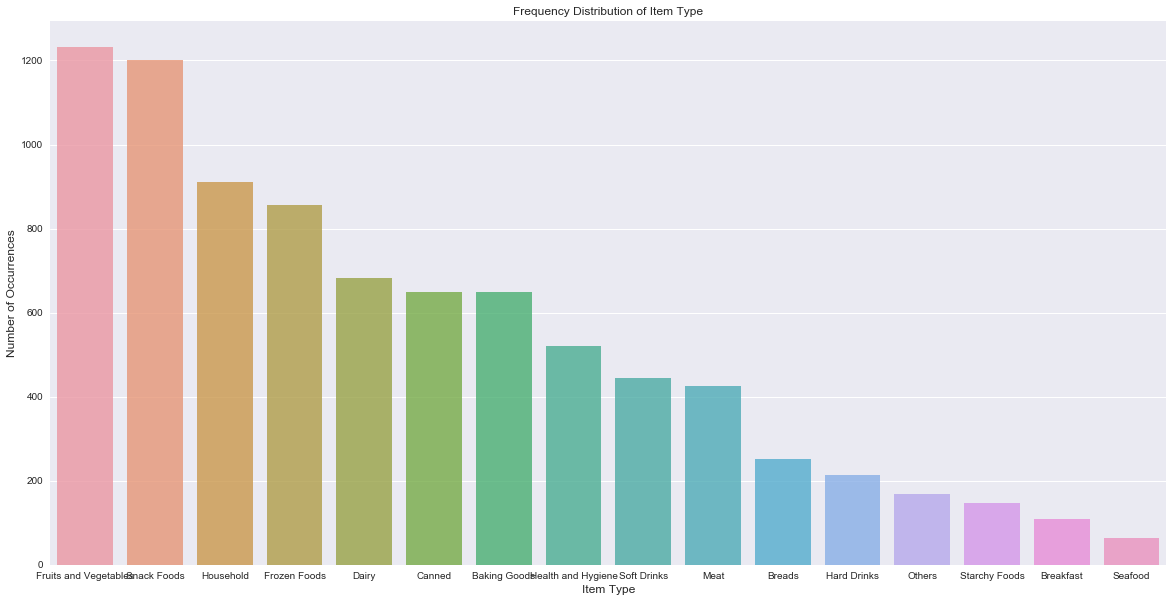

In [11]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set(style="darkgrid")
sns.barplot(ItemType_count.index, ItemType_count.values, alpha=.8,ax=ax)
plt.title('Frequency Distribution of Item Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Item Type', fontsize=12)
plt.show()

In [12]:
# Saving PNG image of chart generated above
#fig.savefig('example.png')

In [13]:
train_copy = train.copy()

train_copy['Outlet_Type'] = train_copy['Outlet_Type'].astype('category')

# Label Encoding

Tip: in Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using .astype() method on your columns like above.

In [14]:
train_copy['Outlet_Type'] = train_copy['Outlet_Type'].cat.codes

train_copy.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  Outlet_Type  \
0                       1999      Medium               Tier 1            1   
1                       2009      Medium               Tier 3            2   
2                       1999      Medium               Tier 1            1   
3                       1998         NaN               Tier 3            0   
4                       1987        High               Tier 3            1   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

# After encding

In [15]:
Outlet_Type = train_copy['Outlet_Type'].value_counts()
Outlet_Type

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

# REPLACE 

In [16]:
replaceMap = {'Outlet_Type':{'Supermarket Type1':1,'Grocery Store':10,
                             'Supermarket Type2':30,'Supermarket Type2':50}}

In [17]:
train_copy1 = train.copy()

train_copy1.replace(replaceMap, inplace=True)

train_copy1.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type Outlet_Type  \
0                       1999      Medium               Tier 1           1   
1                       2009      Medium               Tier 3          50   
2                       1999      Medium               Tier 1           1   
3                       1998         NaN               Tier 3          10   
4                       1987        High               Tier 3           1   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [18]:
from sklearn.preprocessing import LabelEncoder

train_sk = train.copy()

lb_encoder = LabelEncoder()

train_sk['Outlet_Type'] = lb_encoder.fit_transform(train_sk['Outlet_Type'])

train_sk.head()


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  Outlet_Type  \
0                       1999      Medium               Tier 1            1   
1                       2009      Medium               Tier 3            2   
2                       1999      Medium               Tier 1            1   
3                       1998         NaN               Tier 3            0   
4                       1987        High               Tier 3            1   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

# ONE HOT ENCODING

In [19]:
from sklearn.preprocessing import LabelBinarizer

train_oneHot = train.copy()

lb_bin = LabelBinarizer()

lb_results = lb_bin.fit_transform(train_oneHot['Outlet_Type'])

lb_results_df = pd.DataFrame(lb_results, columns=lb_bin.classes_)

lb_results_df.head(2)

Grocery Store  Supermarket Type1  Supermarket Type2  Supermarket Type3
0              0                  1                  0                  0
1              0                  0                  1                  0

Note that this lb_results_df resulted in a new DataFrame with only the one hot encodings for the feature carrier. This needs to be concatenated back with the original DataFrame, which can be done via pandas' .concat() method. The axis argument is set to 1 as you want to merge on columns.

In [20]:
result_df = pd.concat([train_oneHot, lb_results_df], axis=1)

print(result_df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

# BINARY ENCODER

In [21]:
import category_encoders as catEnc

train_binary = train.copy()

encoder = catEnc.BinaryEncoder(cols=['Outlet_Type'])

train_binary = encoder.fit_transform(train_binary)

print(train_binary)


      Outlet_Type_0  Outlet_Type_1  Outlet_Type_2 Item_Identifier  \
0                 0              0              1           FDA15   
1                 0              1              0           DRC01   
2                 0              0              1           FDN15   
3                 0              1              1           FDX07   
4                 0              0              1           NCD19   
5                 0              1              0           FDP36   
6                 0              0              1           FDO10   
7                 1              0              0           FDP10   
8                 0              0              1           FDH17   
9                 0              0              1           FDU28   
10                0              0              1           FDY07   
11                0              0              1           FDA03   
12                0              0              1           FDX32   
13                0              0

# Backward Difference Coding¶

In [23]:
train_backDiff = train.copy()

encoder = catEnc.BackwardDifferenceEncoder(cols=['Outlet_Type'])
df_bd = encoder.fit_transform(train_backDiff)

df_bd.head()

intercept Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0          1           FDA15         9.30          Low Fat         0.016047   
1          1           DRC01         5.92          Regular         0.019278   
2          1           FDN15        17.50          Low Fat         0.016760   
3          1           FDX07        19.20          Regular         0.000000   
4          1           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  Outlet_Type_0  \
0                       1999      Medium               Tier 1          -0.75   
1                       2009      Medium               Tier 3           0.25   
2                       1999      Medium               Tier 1          -0.75   
3                       1998         NaN               Tier 3           0.25   
4                       1987        High               Tier 3          -0.75   

   Outlet_Type_1  Outlet_Type_2  Item_Outlet_Sales  
0           -0.5          -0.25          3735.1380  
1           -0.5          -0.25           443.4228  
2           -0.5          -0.25          2097.2700  
3            0.5          -0.25           732.3800  
4           -0.5          -0.25           994.7052

In [24]:
train_backDiff_test = train.copy()

encoder = catEnc.BackwardDifferenceEncoder(cols=['Outlet_Type','Item_Fat_Content'])
df_bd_1 = encoder.fit_transform(X=train_backDiff_test,y=train_backDiff_test['Item_Outlet_Sales'])

df_bd_1.head(20)

intercept Item_Identifier  Item_Weight  Item_Fat_Content_0  \
0           1           FDA15        9.300                -0.8   
1           1           DRC01        5.920                 0.2   
2           1           FDN15       17.500                -0.8   
3           1           FDX07       19.200                 0.2   
4           1           NCD19        8.930                -0.8   
5           1           FDP36       10.395                 0.2   
6           1           FDO10       13.650                 0.2   
7           1           FDP10          NaN                -0.8   
8           1           FDH17       16.200                 0.2   
9           1           FDU28       19.200                 0.2   
10          1           FDY07       11.800                -0.8   
11          1           FDA03       18.500                 0.2   
12          1           FDX32       15.100                 0.2   
13          1           FDS46       17.600                 0.2   
14          1           FDF32       16.350                -0.8   
15          1           FDP49        9.000                 0.2   
16          1           NCB42       11.800                -0.8   
17          1           FDP49        9.000                 0.2   
18          1           DRI11          NaN                -0.8   
19          1           FDU02       13.350                -0.8   

    Item_Fat_Content_1  Item_Fat_Content_2  Item_Fat_Content_3  \
0                 -0.6                -0.4                -0.2   
1                 -0.6                -0.4                -0.2   
2                 -0.6                -0.4                -0.2   
3                 -0.6                -0.4                -0.2   
4                 -0.6                -0.4                -0.2   
5                 -0.6                -0.4                -0.2   
6                 -0.6                -0.4                -0.2   
7                 -0.6                -0.4                -0.2   
8                 -0.6                -0.4                -0.2   
9                 -0.6                -0.4                -0.2   
10                -0.6                -0.4                -0.2   
11                -0.6                -0.4                -0.2   
12                -0.6                -0.4                -0.2   
13                -0.6                -0.4                -0.2   
14                -0.6                -0.4                -0.2   
15                -0.6                -0.4                -0.2   
16                -0.6                -0.4                -0.2   
17                -0.6                -0.4                -0.2   
18                -0.6                -0.4                -0.2   
19                -0.6                -0.4                -0.2   

    Item_Visibility              Item_Type  Item_MRP Outlet_Identifier  \
0          0.016047                  Dairy  249.8092            OUT049   
1          0.019278            Soft Drinks   48.2692            OUT018   
2          0.016760                   Meat  141.6180            OUT049   
3          0.000000  Fruits and Vegetables  182.0950            OUT010   
4          0.000000              Household   53.8614            OUT013   
5          0.000000           Baking Goods   51.4008            OUT018   
6          0.012741            Snack Foods   57.6588            OUT013   
7          0.127470            Snack Foods  107.7622            OUT027   
8          0.016687           Frozen Foods   96.9726            OUT045   
9          0.094450           Frozen Foods  187.8214            OUT017   
10         0.000000  Fruits and Vegetables   45.5402            OUT049   
11         0.045464                  Dairy  144.1102            OUT046   
12         0.100014  Fruits and Vegetables  145.4786            OUT049   
13         0.047257            Snack Foods  119.6782            OUT046   
14         0.068024  Fruits and Vegetables  196.4426            OUT013   
15         0.069089              Breakfast   5

# Helmert Coding

In [27]:
train_backDiff_helmert = train.copy()

encoder = catEnc.HelmertEncoder(cols=['Outlet_Type','Item_Fat_Content'])
df_bd_2 = encoder.fit_transform(X=train_backDiff_helmert,y=train_backDiff_helmert['Item_Outlet_Sales'])

df_bd_2.head(20)

intercept Item_Identifier  Item_Weight  Item_Fat_Content_0  \
0           1           FDA15        9.300                -1.0   
1           1           DRC01        5.920                 1.0   
2           1           FDN15       17.500                -1.0   
3           1           FDX07       19.200                 1.0   
4           1           NCD19        8.930                -1.0   
5           1           FDP36       10.395                 1.0   
6           1           FDO10       13.650                 1.0   
7           1           FDP10          NaN                -1.0   
8           1           FDH17       16.200                 1.0   
9           1           FDU28       19.200                 1.0   
10          1           FDY07       11.800                -1.0   
11          1           FDA03       18.500                 1.0   
12          1           FDX32       15.100                 1.0   
13          1           FDS46       17.600                 1.0   
14          1           FDF32       16.350                -1.0   
15          1           FDP49        9.000                 1.0   
16          1           NCB42       11.800                -1.0   
17          1           FDP49        9.000                 1.0   
18          1           DRI11          NaN                -1.0   
19          1           FDU02       13.350                -1.0   

    Item_Fat_Content_1  Item_Fat_Content_2  Item_Fat_Content_3  \
0                 -1.0                -1.0                -1.0   
1                 -1.0                -1.0                -1.0   
2                 -1.0                -1.0                -1.0   
3                 -1.0                -1.0                -1.0   
4                 -1.0                -1.0                -1.0   
5                 -1.0                -1.0                -1.0   
6                 -1.0                -1.0                -1.0   
7                 -1.0                -1.0                -1.0   
8                 -1.0                -1.0                -1.0   
9                 -1.0                -1.0                -1.0   
10                -1.0                -1.0                -1.0   
11                -1.0                -1.0                -1.0   
12                -1.0                -1.0                -1.0   
13                -1.0                -1.0                -1.0   
14                -1.0                -1.0                -1.0   
15                -1.0                -1.0                -1.0   
16                -1.0                -1.0                -1.0   
17                -1.0                -1.0                -1.0   
18                -1.0                -1.0                -1.0   
19                -1.0                -1.0                -1.0   

    Item_Visibility              Item_Type  Item_MRP Outlet_Identifier  \
0          0.016047                  Dairy  249.8092            OUT049   
1          0.019278            Soft Drinks   48.2692            OUT018   
2          0.016760                   Meat  141.6180            OUT049   
3          0.000000  Fruits and Vegetables  182.0950            OUT010   
4          0.000000              Household   53.8614            OUT013   
5          0.000000           Baking Goods   51.4008            OUT018   
6          0.012741            Snack Foods   57.6588            OUT013   
7          0.127470            Snack Foods  107.7622            OUT027   
8          0.016687           Frozen Foods   96.9726            OUT045   
9          0.094450           Frozen Foods  187.8214            OUT017   
10         0.000000  Fruits and Vegetables   45.5402            OUT049   
11         0.045464                  Dairy  144.1102            OUT046   
12         0.100014  Fruits and Vegetables  145.4786            OUT049   
13         0.047257            Snack Foods  119.6782            OUT046   
14         0.068024  Fruits and Vegetables  196.4426            OUT013   
15         0.069089              Breakfast   5

In [26]:
df_bd_2['Item_Fat_Content_0'][4]

-0.8